In [2]:
import pandas as pd
import requests
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def pull_data(url):
    r = requests.get(url)
    return pd.DataFrame(r.json()) 

In [4]:
def fix_data_types(data):
    data.dropna( subset=['checkoutmonth', 'checkoutyear'], inplace=True)
    data.checkoutmonth = data.checkoutmonth.astype(int)
    data.checkoutyear = data.checkoutyear.astype(int)
    data.checkouts = data.checkouts.astype(int)
    data.publicationyear = data.publicationyear.astype(int, errors = 'ignore')
    data['month_year_checkout'] = data.apply(
        lambda x: dt.datetime(x.checkoutyear, x.checkoutmonth, 1), axis =1)
    return data

In [5]:
def time_graph(data):
    monthly_data = data[['month_year_checkout', 'checkouts']].groupby('month_year_checkout').sum()

    plt.plot(monthly_data.index, monthly_data.checkouts)
    plt.show()

In [6]:
url = 'https://data.seattle.gov/resource/tjb6-zsmc.json?$where=Title=%271984%27'
r = requests.get(url)

In [7]:
data_1984_checkout = pull_data('https://data.seattle.gov/resource/tjb6-zsmc.json?$where=Title=%271984%27')

In [8]:
data_1984_checkout = fix_data_types(data_1984_checkout)

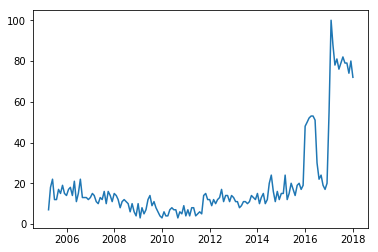

In [9]:
time_graph(data_1984_checkout)

In [10]:
data_oly_checkout  = pull_data('https://data.seattle.gov/resource/tjb6-zsmc.json?$where=subjects%20like%20%27Olympics%25%27&$limit=5000')


In [11]:
data_oly_checkout = fix_data_types(data_oly_checkout)

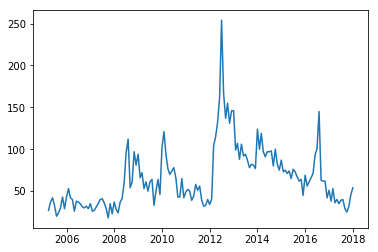

In [12]:
time_graph(data_oly_checkout)

In [13]:
data_ad_checkout = pull_data('https://data.seattle.gov/resource/tjb6-zsmc.json?$where=title%20like%20%27%25the%20art%20of%20the%20deal%25%27')

In [14]:
data_ad_checkout = fix_data_types(data_ad_checkout)

In [21]:
data_ad_checkout[data_ad_checkout.checkoutyear == 2018].head()

,checkoutmonth,checkouts,checkouttype,checkoutyear,creator,materialtype,publicationyear,publisher,subjects,title,usageclass,month_year_checkout
128,1,6,Horizon,2018,"Trump, Donald, 1946-",BOOK,2015.,"Ballantine Books,","Trump Donald 1946, Businesspeople United State...",Trump : the art of the deal / Donald J. Trump ...,Physical,2018-01-01
129,1,1,Horizon,2018,"Trump, Donald, 1946-",SOUNDDISC,[2016],"Random House Audio,","Trump Donald 1946, Businesspeople United State...",Trump : the art of the deal / Donald J. Trump ...,Physical,2018-01-01


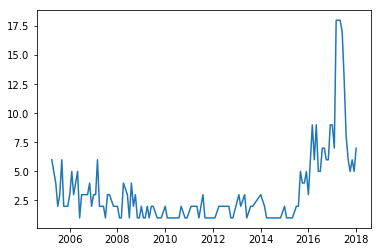

In [15]:
time_graph(data_ad_checkout)

In [22]:
data_ad_checkout.title.value_counts()

Trump the art of the deal                                                                                                                  94
Trump : the art of the deal / Donald J. Trump with Tony Schwartz.                                                                          33
Trump [sound recording] : the art of the deal / Donald J. Trump with Tony Schwartz ; [with a new introduction read by Donald J. Trump].    17
Star Wars Jabba the Hutt the art of the deal                                                                                               14
Trump : the art of the deal / Donald J. Trump with Tony Schwartz ; [with a new introduction read by Donald J. Trump].                       2
Name: title, dtype: int64

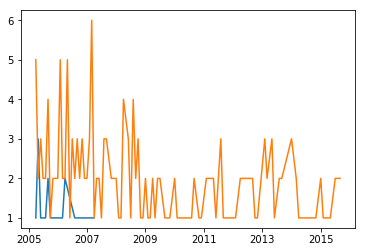

In [20]:
data_ad_checkout_sw = data_ad_checkout[data_ad_checkout.title == 'Star Wars Jabba the Hutt the art of the deal']
data_ad_checkout_dt = data_ad_checkout[data_ad_checkout.title == 'Trump the art of the deal']


monthly_data_sw = data_ad_checkout_sw[['month_year_checkout', 'checkouts']].groupby('month_year_checkout').sum()
monthly_data_dt = data_ad_checkout_dt[['month_year_checkout', 'checkouts']].groupby('month_year_checkout').sum()

plt.plot(monthly_data_sw.index, monthly_data_sw.checkouts)
plt.plot(monthly_data_dt.index, monthly_data_dt.checkouts)
plt.show()